In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from glob import glob
from skimage import io
from matplotlib import cm
import torch.nn as nn
import torch.nn.functional as F
from torch import cat, optim
from torch.utils.data import DataLoader, Dataset
from torch import save, no_grad, max
from torch.cuda import is_available
from PIL import Image
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import torch



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/esp32-data/full_clean'

ONLY FOR NON ROTATED IMAGES

Rocky - 2 clusters

Sandy -

Dirt -


In [4]:
def cluster_objs(img='/rocky/img234.png', k=2, s=False, v=False):
  # Object Detection Logic
  image = io.imread(path + img)
  image = np.array(image, dtype=np.float64) / 255
  rows, cols, channels = image.shape
  image_2d = image.reshape(-1, channels)

  is_white = np.all(image_2d == 1.0, axis=1)
  non_white_pixels = image_2d[~is_white]
  white_positions = np.where(is_white)[0]

  kmeans = KMeans(n_clusters=k, random_state=42)
  image_sample = shuffle(non_white_pixels, random_state=42, n_samples=1000)
  kmeans.fit(image_sample)

  labels = kmeans.predict(non_white_pixels)

  full_labels = np.full(image_2d.shape[0], -1)
  full_labels[~is_white] = labels

  # Display Logic
  if k == 2:
      clustered_image = full_labels.reshape(rows, cols)
      clustered_image[clustered_image == -1] = 255
      plt.imshow(clustered_image, cmap='gray')
  else:
      colormap = cm.get_cmap("tab10", k)
      distinct_colors = colormap(np.arange(k))[:, :3]
      clustered_image = np.zeros_like(image_2d)
      clustered_image[~is_white] = distinct_colors[labels]
      clustered_image[is_white] = [1.0, 1.0, 1.0]
      clustered_image = clustered_image.reshape(rows, cols, channels)
      plt.imshow(clustered_image)

  if s:
      print(silhouette_score(non_white_pixels, labels))


  if v:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image_sample)
    plt.title("Got clusters from")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(image)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(clustered_image)
    plt.title(f"Clustered Image with {k} clusters")
    plt.axis("off")

    plt.show()

  final_imgs = []
  # Generate grayscale images for each cluster
  for cluster in range(k):
      grayscale_image = np.where(full_labels.reshape(rows, cols) == cluster, 0, 1)
      final_imgs.append(grayscale_image)

      if v:
        plt.figure()
        plt.imshow(grayscale_image, cmap='gray')
        plt.title(f"Grayscale Image for Cluster {cluster}")
        plt.axis("off")
        plt.show()
  return final_imgs


<ipython-input-14-30226a38c583>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("tab10", k)


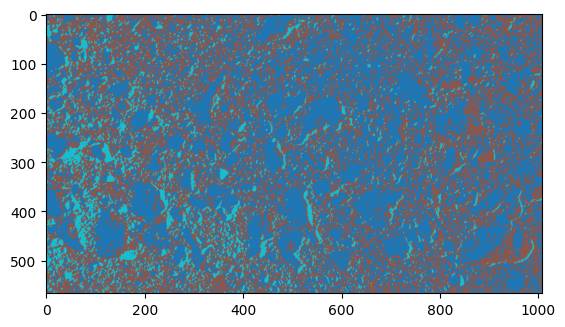

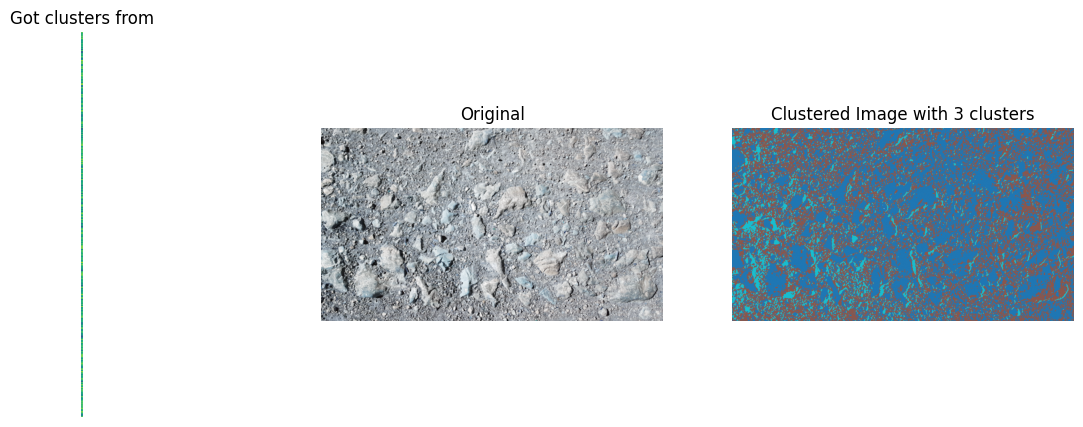

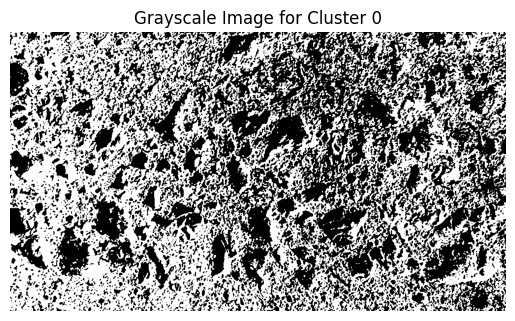

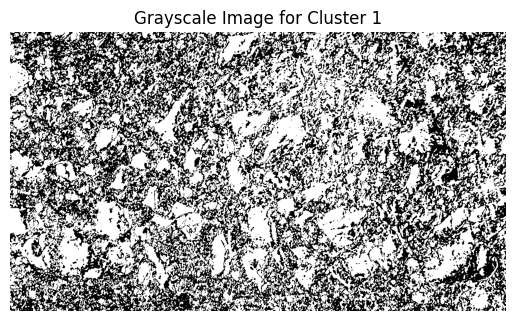

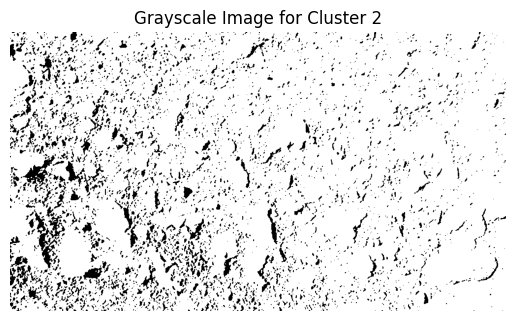

[array([[1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [0, 0, 1, ..., 0, 1, 1],
        [0, 0, 1, ..., 0, 1, 1]]),
 array([[0, 1, 1, ..., 1, 1, 0],
        [0, 1, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 0]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]])]

In [ ]:
cluster_objs(k=3, v=True)

In [ ]:
cluster_objs(img = '/dirt/img3745.png', k=3)

NameError: name 'kmeans' is not defined

<ipython-input-14-30226a38c583>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("tab10", k)


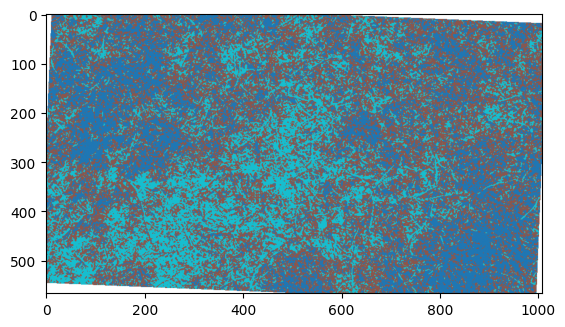

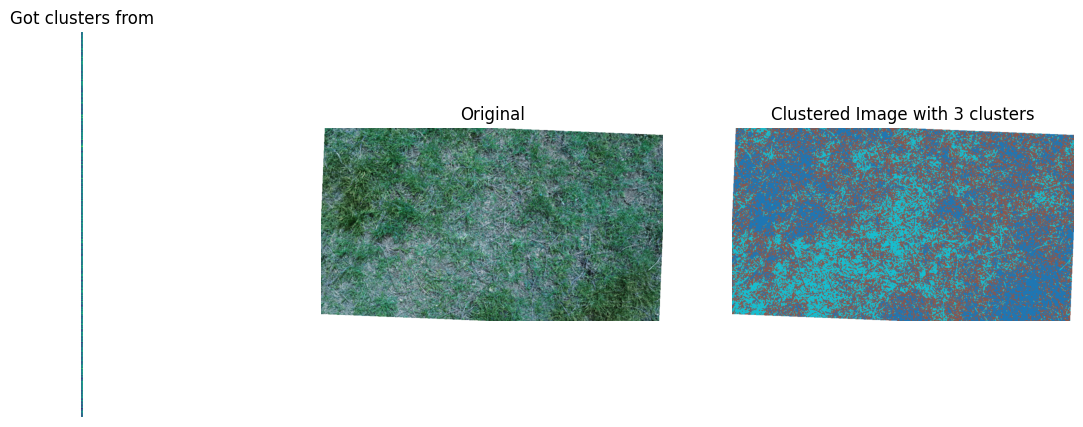

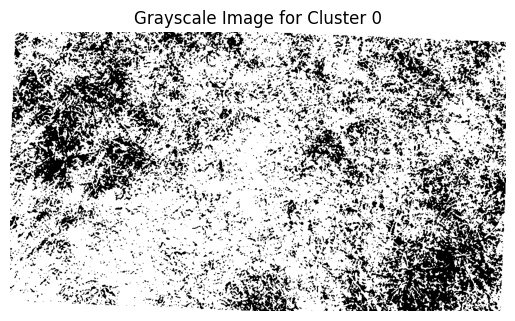

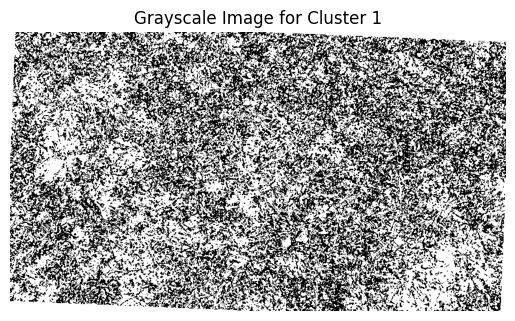

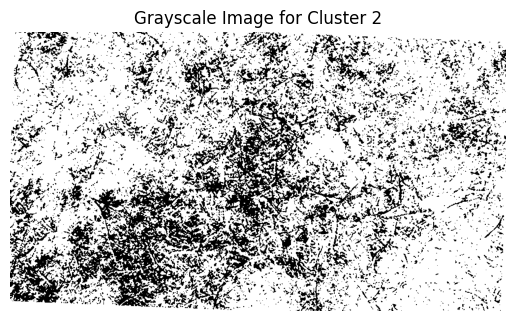

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
cluster_objs(img = '/grassy/img464.png', k=3, v=True)[0]

[1 1 1 ... 0 0 0]


<ipython-input-76-4bb6ad88b6f4>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("tab10", k)


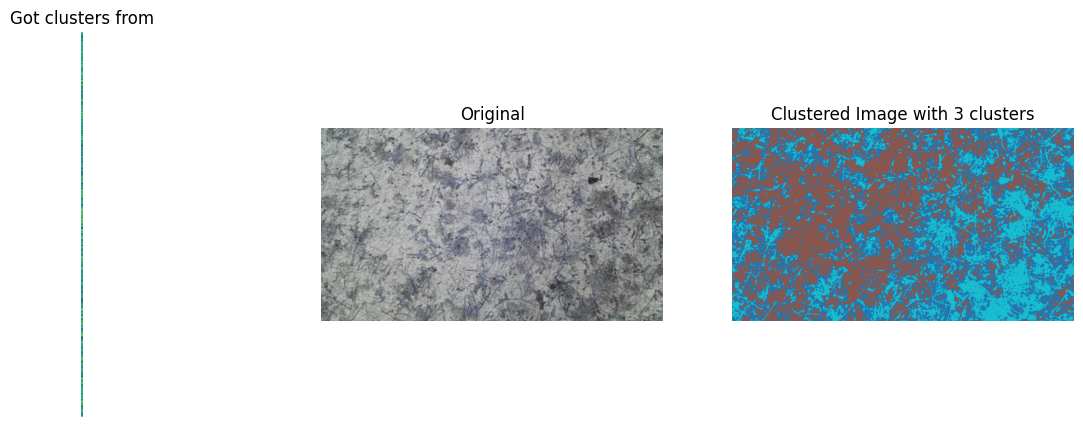

In [ ]:
cluster_objs(img = '/sandy/img6004.png', k=3)

OPTION 2

In [5]:
folder_path = "/content/drive/MyDrive/esp32-data/full_clean"


dirt = "/dirt"; grassy = "/grassy"; rocky = "/rocky"; sandy = "/sandy"

dirt_image_files = glob(folder_path + dirt + '/*.png'); grass_image_files = glob(folder_path + grassy + '/*.png'); rocky_image_files = glob(folder_path + rocky + '/*.png'); sandy_image_files = glob(folder_path + sandy + '/*.png')

print(f"Dirt Images: {len(dirt_image_files)}"); print(f"Grass Images: {len(grass_image_files)}"); print(f"Rocky Images: {len(rocky_image_files)}"); print(f"Sandy Images: {len(sandy_image_files)}")

example_dirt_img = Image.open(dirt_image_files[0])
example_grass_img = Image.open(grass_image_files[0])
example_rocky_img = Image.open(rocky_image_files[0])
example_sandy_img = Image.open(sandy_image_files[0])

print(f"Dirt Image Size: {example_dirt_img.size}")


# Combine all image files and assign labels manually
all_image_files = dirt_image_files + grass_image_files + rocky_image_files + sandy_image_files
labels = [0] * len(dirt_image_files) + [1] * len(grass_image_files) + [2] * len(rocky_image_files) + [3] * len(sandy_image_files)

# Define class names
class_names = ['dirt', 'grass', 'rocky', 'sandy']

# print(f"Labels: {labels}")
print(f"Length of labels: {len(labels)}")
assert len(all_image_files) == len(labels), "Number of image files and labels should be the same."

Dirt Images: 1545
Grass Images: 3000
Rocky Images: 1990
Sandy Images: 2280
Dirt Image Size: (1000, 563)
Length of labels: 8815


In [6]:
#Mini model
mini = True
if mini:
  transform = transforms.Compose([
      transforms.Resize((128, 64)),  # Resize images
      transforms.ToTensor()          # Convert to tensor
  ])
else:
  transform = transforms.Compose([
      transforms.Resize((512, 256)),  # Resize images
      transforms.ToTensor()          # Convert to tensor
  ])

class CustomImageDataset(Dataset):
    def __init__(self, image_files, labels, transform=None):
        self.image_files = image_files
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image
        img_path = self.image_files[idx]
        image = Image.open(img_path)

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Get corresponding label
        label = self.labels[idx]

        return image, label

In [7]:
assert len(all_image_files) == len(labels), "Number of image files and labels should be the same."
train_image_files, val_image_files, train_labels, val_labels = train_test_split(all_image_files, labels, test_size=0.2, random_state=42)

# Instantiate the dataset
dataset = CustomImageDataset(image_files=all_image_files, labels=labels, transform=transform)

# Create custom datasets for training and validation
train_dataset = CustomImageDataset(image_files=train_image_files, labels=train_labels, transform=transform)
# test_dataset = CustomImageDataset(image_files=test_image_files, labels=test_labels, transform=transform)
val_dataset = CustomImageDataset(image_files=val_image_files, labels=val_labels, transform=transform)

# Create DataLoader for both training and validation
batch_size = 16
print(f"Batch size: {batch_size}")
num_workers = 8
print(f"Number of workers: {num_workers}")
# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)

val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)


# Create a DataLoader for batching # Defunct
# Example: Get one batch from DataLoader
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

print(f"Batch of images shape: {images.shape}")
print(f"Batch of labels: {labels}")


Batch size: 16
Number of workers: 8


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch of images shape: torch.Size([16, 3, 128, 64])
Batch of labels: tensor([1, 0, 0, 2, 2, 2, 1, 2, 3, 0, 0, 1, 1, 1, 3, 1])


In [8]:
#New architecture based on arch from option 1
class CNNModelForLayering(nn.Module):
    def __init__(self, mini=True):
        super(CNNModelForLayering, self).__init__()
        self.mini = mini

        #First convulutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        #Second convulutional layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.AdaptiveMaxPool2d((1, None))

        # Fully connected layers
        if self.mini:
          self.fc1 = nn.Linear(32 * 1 * 64, 512)
        else:
          self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 128)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, x.shape[1] * x.shape[2] * x.shape[3])
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class finalConnectedNetwork(nn.Module):

  @staticmethod
  def cluster_objs(batch, k, device = torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    # Object Detection Logic
    final_imgs = []
    for img in batch:
      if is_available():
        img = img.cpu()
      image = img.numpy()
      image = np.array(image, dtype=np.float64) / 255
      rows, cols, channels = image.shape
      image_2d = image.reshape(-1, channels)

      is_white = np.all(image_2d == 1.0, axis=1)
      non_white_pixels = image_2d[~is_white]
      white_positions = np.where(is_white)[0]

      kmeans = KMeans(n_clusters=k, random_state=42)
      available_samples = len(non_white_pixels)
      sample_size = min(1000, available_samples)
      if sample_size > 0:
          image_sample = shuffle(non_white_pixels, random_state=42, n_samples=sample_size)
          kmeans.fit(image_sample)
      else:
          raise ValueError("You cannot train this network with a fully white image")

      labels = kmeans.predict(non_white_pixels)

      full_labels = np.full(image_2d.shape[0], -1)
      full_labels[~is_white] = labels


      # Generate grayscale images for each cluster
      sequence = []
      for cluster in range(k):
          grayscale_image = np.where(full_labels.reshape(rows, cols) == cluster, 0, 1)
          sequence.append(grayscale_image[np.newaxis, :, :])
      final_imgs.append(np.stack(sequence))

    return torch.tensor(np.stack(final_imgs), dtype=torch.float32).to(device)


  def __init__(self, k):
        super(finalConnectedNetwork, self).__init__()
        self.k = k
        self.models = nn.ModuleList([CNNModelForLayering().to("cuda") if is_available() else CNNModelForLayering() for _ in range(k)])
        self.shared_fc = nn.Linear(k * 128, 4)

  def forward(self, batch_input):
      inputs = self.cluster_objs(batch_input, self.k)  # Shape: [batch_size, k, 1, height, width]
      batch_size = inputs.size(0)
      features = []
      for i, model in enumerate(self.models):
          cluster_inputs = inputs[:, i, :, :, :]  # Shape: [batch_size, 1, height, width]
          cluster_features = model(cluster_inputs)
          features.append(cluster_features)

      combined = torch.cat(features, dim=1)  # Shape: [batch_size, k * 128]

      # Shared fully connected layer
      output = self.shared_fc(combined)  # Shape: [batch_size, 4]
      return output


In [9]:
#Pipeline Logic *use same split logic and accuracy from option1


def train_pipeline(k=3, learning_rate = 0.001, num_epochs = 5, model_out_path = "/content/drive/MyDrive/esp32-data/models/", train_dataloader = [], val_dataloader = []):
  model_out_path += f"model-layered_k={k}.pth"
  print(model_out_path)
  model = finalConnectedNetwork(k=k)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model = model.to(device)

  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  criterion = nn.CrossEntropyLoss()
  train_losses = []
  val_losses = []

  try:
    for epoch in range(num_epochs):
      model.train()
      epoch_loss = 0
      num_batches = 0
      for images, labels in train_dataloader:
        num_batches += 1
        if num_batches % 25 == 0:
          print(num_batches, end=", ")

        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
      train_losses.append(epoch_loss/len(train_dataloader))
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}")

      #Validation
      model.eval()  # Set model to evaluation mode
      val_running_loss = 0.0
      val_correct = 0
      val_total = 0

      with no_grad():  # No gradients needed for validation
          for images, labels in val_dataloader:
              images = images.to(device)
              labels = labels.to(device)

              outputs = model(images)
              loss = criterion(outputs, labels)

              val_running_loss += loss.item()
              _, predicted = max(outputs, 1)
              val_total += labels.size(0)
              val_correct += (predicted == labels).sum().item()

      # Store validation loss for graphing
      val_losses.append(val_running_loss / len(val_dataloader))

      # Print validation statistics
      print(f"Validation Loss: {val_running_loss / len(val_dataloader):.4f}, Validation Accuracy: {100 * val_correct / val_total:.2f}%")

    save(model.state_dict(), model_out_path)
  except KeyboardInterrupt:
    print("Saving model...")
    save(model.state_dict(), model_out_path)



In [10]:
def plot_loss_curves(k=3):
  plt.plot(train_losses, label='Training Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'Training and Validation Loss for k={k}')
  plt.legend()
  plt.show()

In [54]:
train_pipeline(train_dataloader=train_dataloader, val_dataloader=val_dataloader, num_epochs = 10)

/content/drive/MyDrive/esp32-data/models/model-layered_k=3.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [1/10], Loss: 0.8078


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.5584, Validation Accuracy: 77.71%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [2/10], Loss: 0.4630


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.4788, Validation Accuracy: 79.69%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [3/10], Loss: 0.3538


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.4576, Validation Accuracy: 81.79%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [4/10], Loss: 0.2911


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.4793, Validation Accuracy: 81.40%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, Saving model...


In [11]:
plot_loss_curves(k=3)

NameError: name 'train_losses' is not defined

In [12]:
train_pipeline(k=2, train_dataloader=train_dataloader, val_dataloader=val_dataloader, num_epochs = 10)

/content/drive/MyDrive/esp32-data/models/model-layered_k=2.pth
25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [1/10], Loss: 0.8246


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.6128, Validation Accuracy: 74.65%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [2/10], Loss: 0.4967


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.4997, Validation Accuracy: 79.24%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [3/10], Loss: 0.3879


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.4424, Validation Accuracy: 81.57%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [4/10], Loss: 0.3333


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.4152, Validation Accuracy: 81.45%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, Saving model...


In [13]:
plot_loss_curves(k=2)

NameError: name 'train_losses' is not defined

In [ ]:
train_pipeline(k=4, train_dataloader=train_dataloader, val_dataloader=val_dataloader, num_epochs = 4)

/content/drive/MyDrive/esp32-data/models/model-layered_k=4.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, Epoch [1/4], Loss: 0.8541


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 0.6457, Validation Accuracy: 74.82%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 

In [ ]:
plot_loss_curves(k=4)

Ensembling Logic

In [ ]:
def weighted_voting(probabilities, weights):
    """
    Ensemble predictions using weighted voting.

    Args:
    - probabilities: A 3D array where each element is a probability vector (n_models x n_samples x n_classes).
    - weights: A list of weights corresponding to each model.

    Returns:
    - Final ensemble prediction (class with highest weighted probability).
    """
    weighted_probabilities = np.tensordot(weights, probabilities, axes=1)
    return np.argmax(weighted_probabilities, axis=1)

# Example: Probabilities from 2 models with weights
model_1_probs = [[0.1, 0.7, 0.1, 0.1], [0.2, 0.5, 0.2, 0.1]]
model_2_probs = [[0.2, 0.6, 0.1, 0.1], [0.1, 0.4, 0.4, 0.1]]
weights = [0.7, 0.3]

ensemble_prediction = weighted_voting(np.array([model_1_probs, model_2_probs]), weights)
print("Ensemble Prediction:", ensemble_prediction)
